### Intro

> OCR은 문자 영역 검출(text detection)과 검출된 영역의 문자 인식(text recognition)을 수행하는 task로 이미지 속에서 글자를 인식하는 기술입니다.

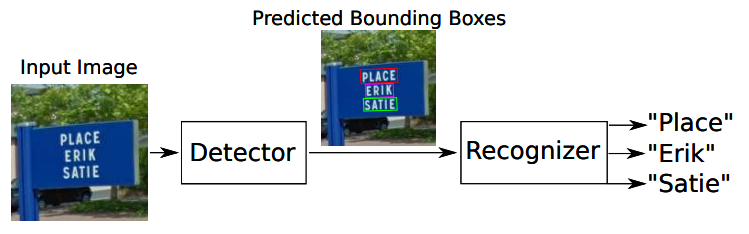

<br>

*Text detection

>object detection and segmentation기술을 이용하여 문자의 독특한 특성까지 고려합니다.


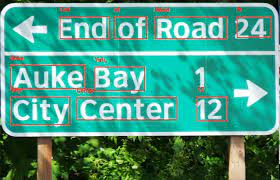

<br>

*Text recognition

>검출된 영역의 문자가 무엇인지 인식하는 과정입니다.

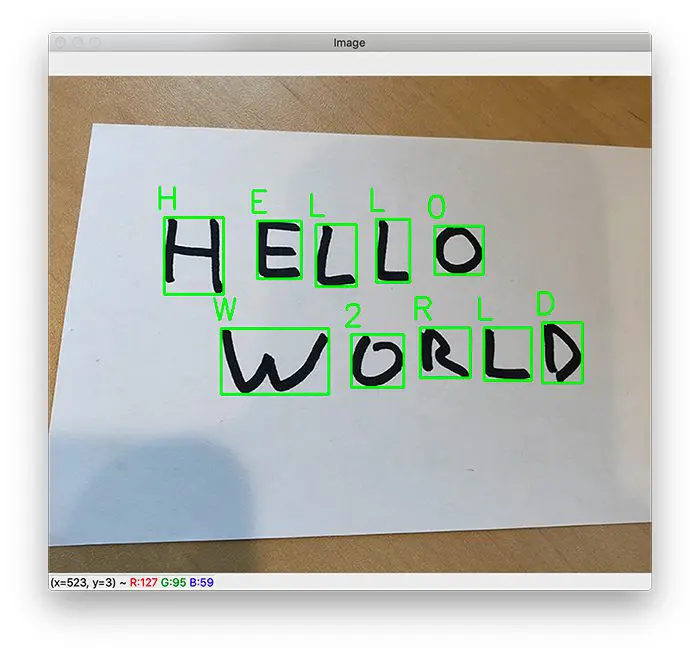


*학습 목표

- Deep learning 기반의 OCR을 이해합니다.

- Text를 Detection하기 위한 딥러닝 기법을 배웁니다.

- Text를 Recognize하기 위한 딥러닝 기법을 배웁니다.

---
<br>


###  History

*1928년 오스트리아 Gustav Tauscheck: 포토 센서 이용한 패턴 매칭(Reading Machine)

*1931년 이스라엘 Emanuel Goldberg가 최초의 OCR장치 탄생(Statistical machine)

*1985~2006년 휴렛 패커드사에서 Tesseract OCR이 개발되어 LSTM에 적용되고 딥러닝 베이스 아키텍처로 발전합

참고문헌:https://arxiv.org/pdf/1811.06193.pdf

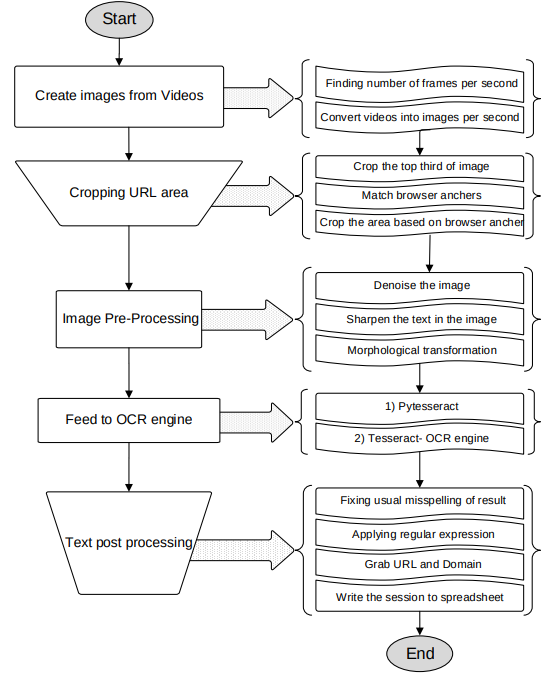

1. Adaptive Thresholding

- 입력영상의 이진화를 통해 흑백으로 변환

2. Connected Componet Analysis

- 문자 영역 검출

3. Find Lines and Words

- 라인 또는 단어 단위로 추출

4. Recognize Word

- 단어 단위 이미지를 text로 변환하기 위해 문자를 하나씩 인식하고 다시 결합하는 과정

---

<br>

### Main Architecture

#### Text detection


>이미지 속 텍스트의 위치를 찾는 방법

*이미지 속 문자 특성

- 문자는 단어 혹은 문장을 이루기에 최소 단위 정하기


<br>

참고문헌:https://arxiv.org/pdf/1704.03155v2.pdf


1. Regression

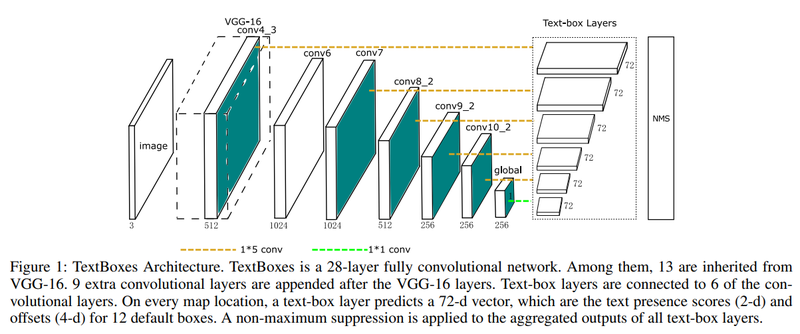

- 긴 단어의 feature 활용

   - 1x5 convolution filter
   
   - Anchor box의 aspect ratio(종횡비): 1,2,3,5,7
   
   >종횡비는 가로 세로 길이의 비를 의미하기에 가로세로비,영상비, 화면비로 부릅니다.
   
   - vertical offset적용하여 세로방향 배열에 대응
   
   >Offset은 특정값에서 차이가 나는 값 혹은 차이를 의미하지만 오차와는 다릅니다. <br> 왜냐하면, offset은 차이가 목적에 의해 만들어진 것과 상황에 따라 자연스럽게 발생되는 모든 것을 포함합니다.
   
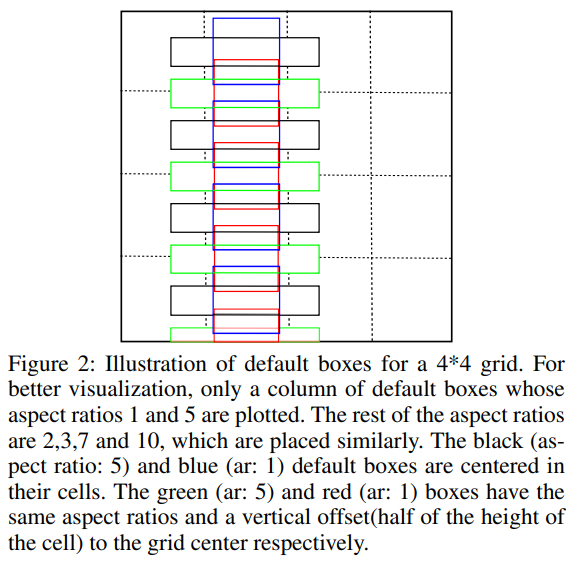

*그림 설명

Grid cell의 중앙을 기점으로 생성할 경우를 예로 든 것이 파란색(aspect ratio:1) 그리고 검은색 박스(aspect ratio:1)입니다.

그리고 이를 수직방향으로 옮겨서 촘촘하게 만들어준 것이 빨간색과 녹색입니다. 

수직방향으로 Anchor box의 중앙을 하나 더 둠으로써 세로로 촘촘하게 Anchor box를 배치할 수 있게 됩니다.

<br>

2. Segmentation

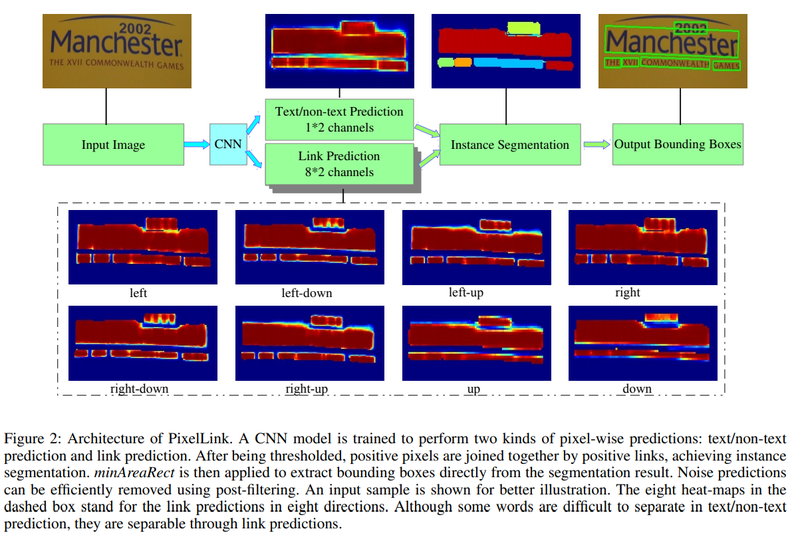

>semantic segmentation이 이미지 내의 영역을 class로 분류하듯이 이 기술을 통해 배경과 글자 영역 분리가 가능합니다. 

<br>

3. PixelLink

> segmentation이 text 영역을 찾으면, 글자가 어디와 연결되었는지를 같이 학습하여 text영역간의 분리 및 연결하는 정보를 추가적으로 활용합니다.


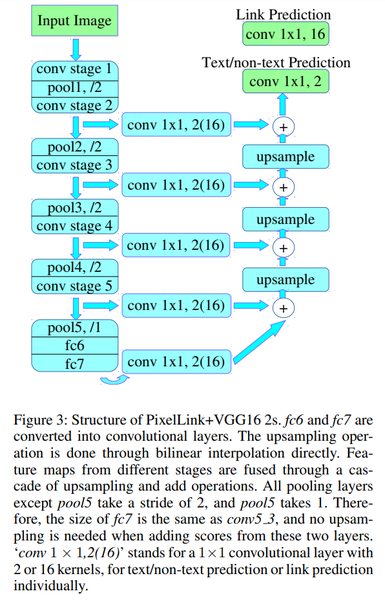


*특징

- 전체적인 구조: U-Net

   - Layer: conv 1X1, 2(16)

   - pixel간 연결 구조 지속성 유지
   
   >Instance segmentation가능: 인접한 pixel이 중심 pixel과 단어 단위로 연결인지 분리되어 있는지 아니면 문자 영역이 단위로 분리되었는지등을 알 수 있게 됩니다.
   
- Output: 9가지

   - Class segmentation map
   
   >Text/non-text prediction으로 Text인지 Non-text인지 예측값을 의미하는 2개의 커널을 가집니다.
   
   - Link Prediction map
   
   >나머지 8개는 글자의 Pixel중심으로 인접한 픽셀에 대한 연결 여부를 의미하는 16개 커널로 이뤄진 것입니다.

- 녹색: Input or Output

<br>

참고 문헌:https://arxiv.org/abs/1904.01941

1, CRAFT

*정의

>문자단위로 문자의 위치를 찾고 연결한 후 Segmentation으로 구현한 것입니다.

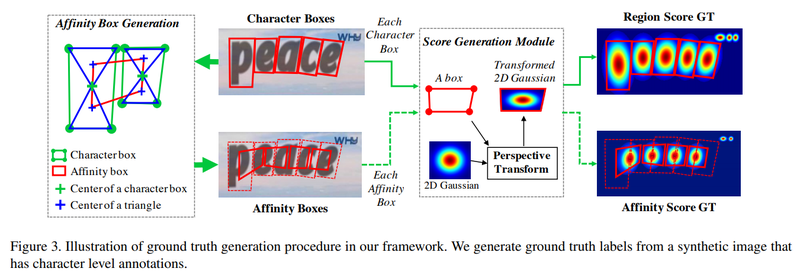


*특징

[학습]

- 문자의 영역을 boundary로 명확하게 구분 안함

- 가우시안 분포를 따르는 원형 score  map 만들어서 배치

- 단어 단위의 정보를 이용하여 단어의 영역을 Inference하기

- 문자 단위의 위치를 다시 학습하는 약지도학습활용

<br>

2. Pyramid Mask Text Detector(PMTD)


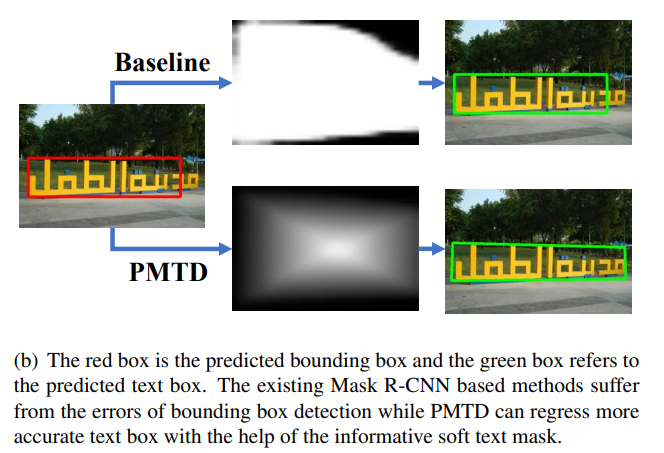


- Mask-RCNN의 구조 활용을 통해 Text영역을 Region proposal network로 찾기

- Box head에서 정확한 regression 및 classification하기

- Mask head에서 Instance segmentation과정 거치기

- Soft-segmentatino을 활용하여 Mask정보 부족현상 반영

- 사각형 배치 특성을 바녕하여 score map활용

<br>

#### Text recogntion

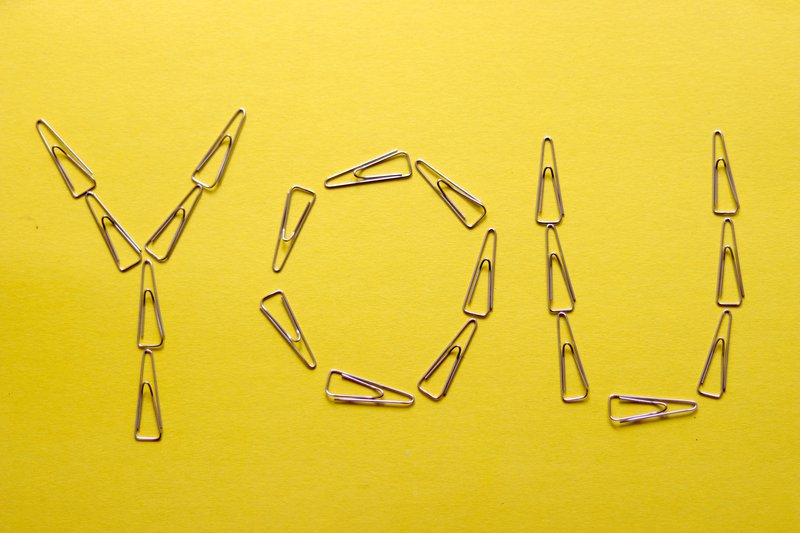


1. Unsegmented Data

>분리에 드는 비용이 많이 들거나 어려워서 segmentation이 되지 않은 데이터들이 서로 시퀀스를 이루고 있습니다.

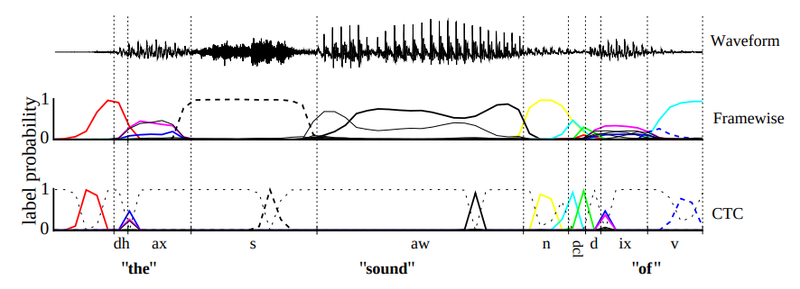

<br>

2. CRNN

>CNN의 특징과 RNN의 특징을 합친 것입니다. <br> CRNN에서 Step마다 FC layer의 logit을 softmax함수에 넣어 어떤 문자일 확률이 높은지 알게 됩니다.

*CNN

- 문자 이미지에서 정보 추출(Feature extractor)

- Map tp sequence를 이용해 sequence형태의 feature로 변환

- feature is input data

*RNN

- Feature로부터 문자 인식하고 넓은 정보 필요(LSTM)

- Bidirectional LSTM을 이용해 STEP마다 결과

- 결과는 Transcription layer에ㅛㅓ 문자로 변환

<br>

3. CTC

>Input과 output가 서로 다른 길이의 시퀀스를 가질 때 align없이 활용하는 방법입니다.

*Label sequence의 확률 구하기

- Label Encode에서 같은 문자 구분

   - Blank를 중복된 라벨 사이를 구분하기 위해 넣기
   

- Decode

   - 중복 제거
   
   - 인식 문자 아닌 값 제거
   
   
<br>

4. TPS(Thin Plate Spline)

>Transformation을 적용하여 입력 이미지를 단어 영역에 맞게 변형시켜 인식을 잘되게 합니다.

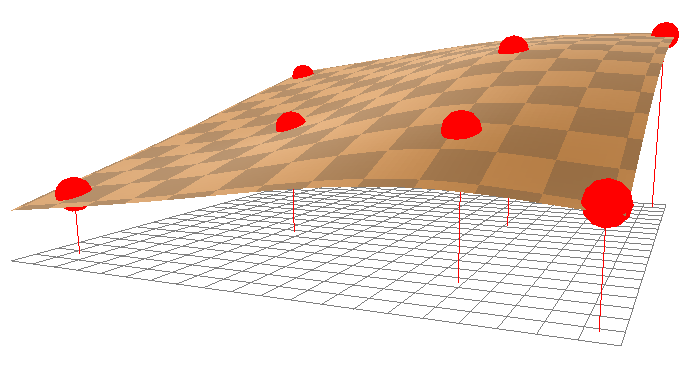


- Control point정의

- point들이 특정 위치로 옮겨진다.

- 축 방향의 변화를 interpolation하여 모든 위치의 변화 추정

- 결과: 전체 이미지의 pixel변화를 control point만들기

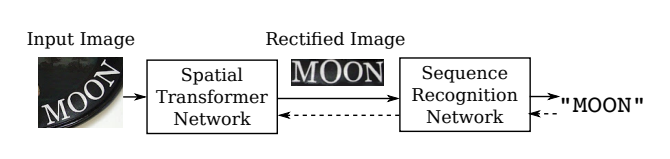

---

<br>

### Text recognition Attention


1, Attention sequence prediction

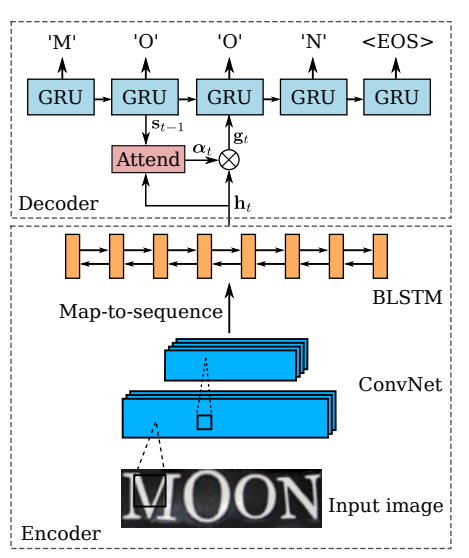

>문장의 길이 고정되고, 입력되는 feature에 대해 attention을 기반으로 해당 글자의 label을 prediction합니다.

- RNN: Character label

   - 입력 feature에 대한 Attentino기반으로 label추정
   
   - label을 다시 입력으로 사용하여 다음글자 추정
   
   
<br>

2. Transformer

*Attention이 시각화된 이미지(각 step에 따라 입력에 대한 Visual Attention 시각화)
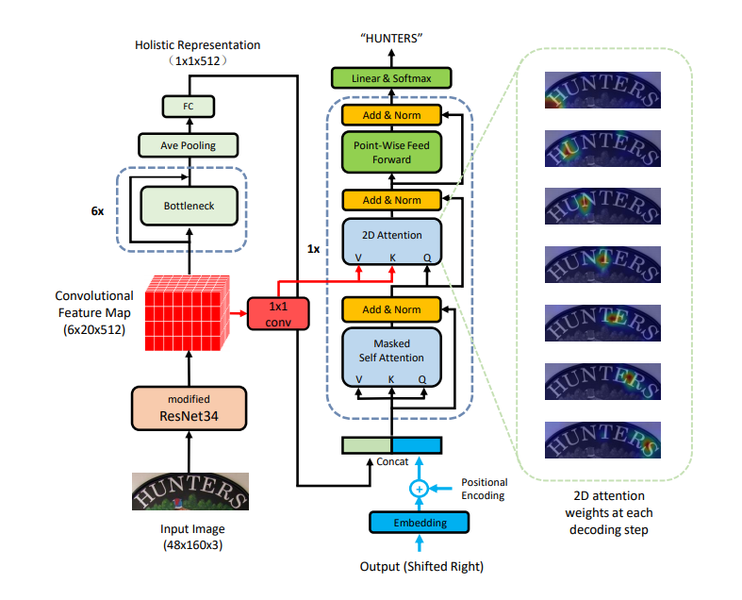

참고문헌: https://arxiv.org/pdf/1904.01375v1.pdf

>Irregular text를 잘 인식하기 위해 2d space에 대한 attention을 활용해 문자인식합니다.(by Transformer)


---

*정리

- Transformer

>Query,Key,Value개념을 이용해서 self-attention을 입력으로 부터 만들어내어 중요한 feature가 weight됩니다.


- Attention

>Decoder은 Encoder의 state에 가중치가 높게 매겨집니다.